# This is built to be used with a Wyscout Team Stats export only right now.
### To run this, download the last 3 or so seasons (including current season) of a team's Stats tab in Wyscout, (ensure at least the goals scored column is downloaded... that is the only variable one needed). Place those files in a specific folder with just those files, and enter that folder's file path below. Change the other info as needed. The "tean" variable has to match the Team name in Wyscout, and make sure to name your club's image the same name.
#### This code can certainly be modified to take any sort of input (FBRef included), so feel free to change how it pulls data

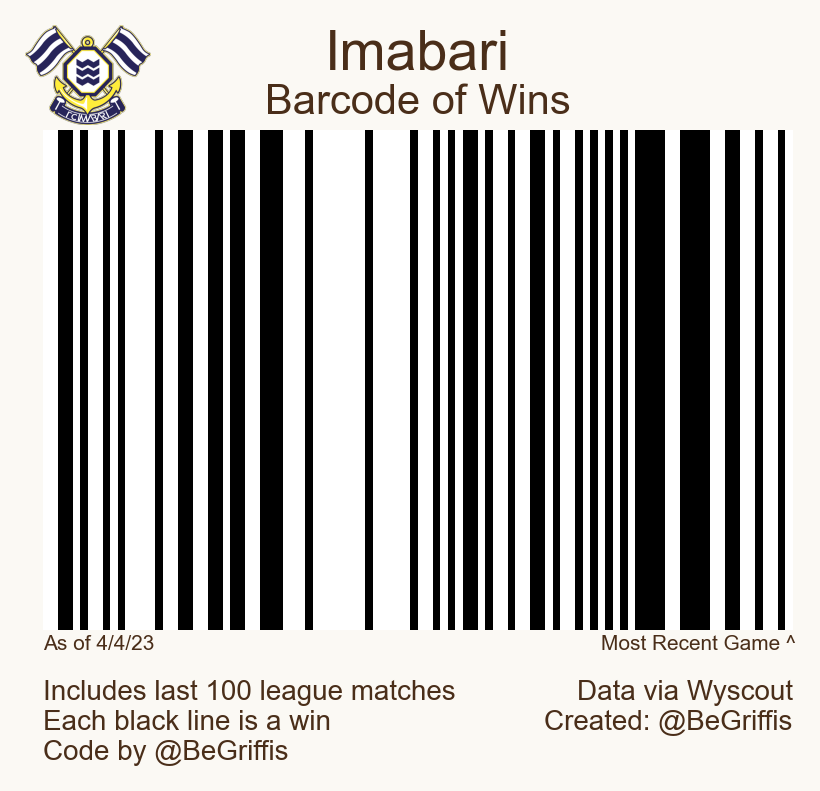

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path
sns.set_theme(style="white")

############# Change these variables #############

league = 'J3'
team = "Imabari"
date = 'As of 4/4/23'
signature = '@BeGriffis'
image = Image.open('C:/Users/You/Path to team image.png')

### This is where your Wyscout Team Stat files are located...
### Make certain the ONLY .xlsx files in this folder are the team's files
path = "C:/Users/You/Folder with team stats excels"

###################################################

df = pd.DataFrame()
for file in os.listdir(path):
    if file.endswith(".xlsx"):
        new = pd.read_excel(os.path.join(path, file))[::-1]
        new = new.reset_index(drop=True).reset_index(drop=False)
        new.rename(columns={'index':'Match Number'},inplace=True)
        new['Match Number'] = (new['Match Number'] + 1)/2
        df = pd.concat([df , new], axis=0)

df.dropna(subset=['Match'],inplace=True)
df.reset_index(drop=True,inplace=True)
df = df.sort_values(by=['Date'],ascending=False).reset_index(drop=True)
df['Conceded goals'] = df.Goals.shift(-1)


df = df[['Match', 'Date', 'Team','Goals','Conceded goals']]

df['Goal difference'] = df['Goals']-df['Conceded goals']
df['Win_yn'] = 0
for i in range(len(df)):
    if df['Goal difference'][i] > 0:
        df['Win_yn'][i] = 1
    if df['Goal difference'][i] == 0:
        df['Win_yn'][i] = 0
    if df['Goal difference'][i] < 0:
        df['Win_yn'][i] = 0

df = df[df['Team']==team].reset_index(drop=True)

### This is where you get the last X games. I like 100, as it creates a good-looking, realistic barcode for most teams
df = df.head(100)

code = np.array(df.Win_yn[::-1])
pixel_per_bar = 4
dpi = 250

fig = plt.figure(figsize=(len(code) * pixel_per_bar / dpi, 2), dpi=dpi)
fig.set_facecolor('#fbf9f4')
ax = fig.add_axes([0, 0, 1, 1])  # span the whole figure
ax.set_axis_off()
ax.imshow(code.reshape(1, -1), cmap='binary', aspect='auto',
          interpolation='nearest')
fig.set_size_inches(3,2)
fig.text(.5, 1.1, team,
        va='bottom', ha='center', size=16, color='#4A2E19')
fig.text(.5, 1.015, 'Barcode of Wins',
        va='bottom', ha='center', size=12, color='#4A2E19')
fig.text(0, -.1, 'Includes last 100 league matches\nEach black line is a win\nCode by @BeGriffis',
        va='top', ha='left', size=8, color='#4A2E19')
fig.text(1, -.1, 'Data via Wyscout\nCreated: %s' %signature,
        va='top', ha='right', size=8, color='#4A2E19')
fig.text(1.004, -.01, 'Most Recent Game ^',
        va='top', ha='right', size=6, color='#4A2E19')
fig.text(0, -.01, date,
        va='top', ha='left', size=6, color='#4A2E19')

newax = fig.add_axes([-.04,1.01,0.2,0.2], anchor='C', zorder=1)
newax.imshow(image)
newax.axis('off')

fig.savefig('%s Winning Barcode.png' %team, bbox_inches='tight')

